# Libreta de Guillermo
Se hacen pruebas sobre las distintas etapas del proyecto individualmente para después juntar lo mejor de todas

Para almacenar llaves de git: `git config credential.helper store`

# 1. Cargar los datos

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from zipfile import ZipFile

## Descargar datos directamente de la página

In [13]:
subdir = "./data/"
zip_url = "https://archive.ics.uci.edu/static/public/186/wine+quality.zip"
zip_file = "wine+quality.zip"
white_wine_file = "winequality-white.csv"
red_wine_file = "winequality-red.csv"

# Descarga y Descomprime el ZIP
if not os.path.exists(zip_file):
    if not os.path.exists(subdir):
        os.makedirs(subdir)
    urllib.request.urlretrieve(zip_url, subdir + zip_file)  
    with ZipFile(subdir + zip_file, "r") as zip_ref:
        zip_ref.extractall(subdir)

In [14]:
# Leer el archivo CSV en un DataFrame
df = pd.read_csv(subdir + red_wine_file, sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
df.shape

(1599, 12)

## Valores faltantes

In [16]:
df.isna().sum()
# Usar pandas profiler

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Información de las columnas

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Descripción estadística de los datos

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# 2. Análisis exploratorio
Poner:
- distribuciones de las variables
- correlación con la variable objetivo
- outliers (boxplot, histograms) PyOD

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

## Conteo de entradas por calidad

In [20]:
fig = px.histogram(df, x=df['quality'])
fig.update_layout(
    bargap=0.2,
    width=600,  
    height=400
)
fig.show()

## Boxplots por calidad

In [21]:
fig = make_subplots(rows=3, cols=4, subplot_titles=df.columns[:-1])

for i, column in enumerate(df.columns[:-1]): 
    row = (i // 4) + 1
    col = (i % 4) + 1
    box_trace = go.Box(x=df['quality'], y=df[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=1200,
    width=1750 
)
fig.show()

## Matriz de correlación con las características originales

<Axes: >

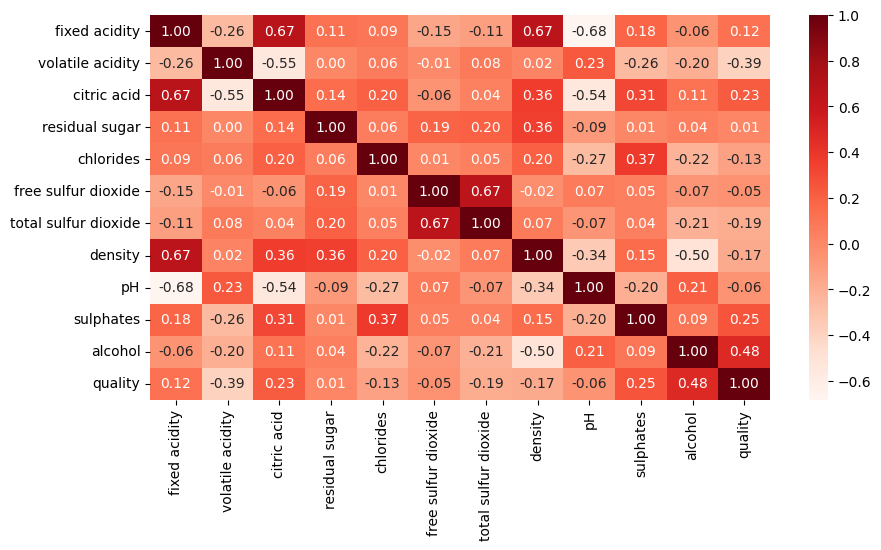

In [22]:
# correlation and headtmap
plt.figure(figsize = (10,5))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True,cmap='Reds', fmt = '.2f')
# Quitar parte de abajo

# Limpieza

In [23]:
quality_corr = corr_matrix.loc["quality"].abs().sort_values().drop("quality")
quality_corr

residual sugar          0.013732
free sulfur dioxide     0.050656
pH                      0.057731
fixed acidity           0.124052
chlorides               0.128907
density                 0.174919
total sulfur dioxide    0.185100
citric acid             0.226373
sulphates               0.251397
volatile acidity        0.390558
alcohol                 0.476166
Name: quality, dtype: float64

In [24]:
# Variables con baja correlación
CORR_THRESH = 0.10 # Una correlación menor se considera muy baja
low_corr_vars = quality_corr[quality_corr < CORR_THRESH]
low_corr_vars

residual sugar         0.013732
free sulfur dioxide    0.050656
pH                     0.057731
Name: quality, dtype: float64

In [25]:
low_corr_names = low_corr_vars.index.tolist()
low_corr_names

['residual sugar', 'free sulfur dioxide', 'pH']

In [26]:
df_trans = df.drop(columns=low_corr_names)
df_trans.head()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


## Matriz de correlación con las características reducidas

<Axes: >

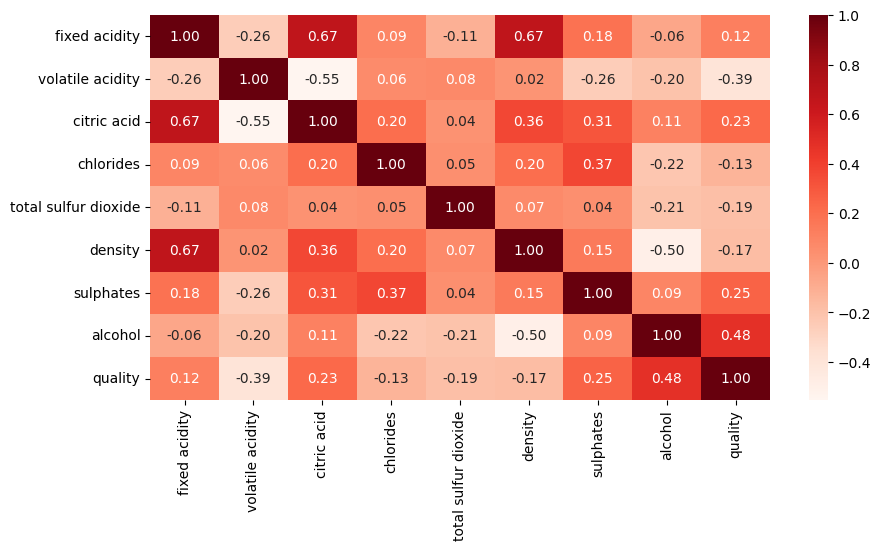

In [27]:
# correlation and headtmap
plt.figure(figsize = (10,5))
trans_corr_matrix = df_trans.corr()
sns.heatmap(trans_corr_matrix, annot=True,cmap='Reds', fmt = '.2f')

Se puede ver que las variables *fixed acidity*, *citric acid* y *density* tienen una correlación de 0.67, nos vendría bien dejar solo una para representar las tres

In [28]:
high_corr_names = ["fixed acidity", "citric acid", "density"]
trans_quality_corr = (trans_corr_matrix
                      .loc["quality"]   # Nos fijamos en corr con calidad
                      [high_corr_names] # Filtramos las variables con alta corr.
                      .abs()            # Tomamos el valor absoluto
                      .sort_values()    # Ordenamos los valores (ascendente)
                    )
trans_quality_corr

fixed acidity    0.124052
density          0.174919
citric acid      0.226373
Name: quality, dtype: float64

Ahora quedémonos solo con una variable de dos que tengan alta correlación, y la forma de decidir a cual no le damos cuello será aquella que tenga una mayor correlación con la variable objetivo *quality*.  
En este caso, quedemonos con *citric acid* por tener la correlación más alta (22%).

In [29]:
df_trans2 = df_trans.drop(columns=["fixed acidity", "density"])

In [30]:
df_trans2.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.56,9.4,5
1,0.88,0.00,0.098,67.0,0.68,9.8,5
2,0.76,0.04,0.092,54.0,0.65,9.8,5
3,0.28,0.56,0.075,60.0,0.58,9.8,6
4,0.70,0.00,0.076,34.0,0.56,9.4,5


<Axes: >

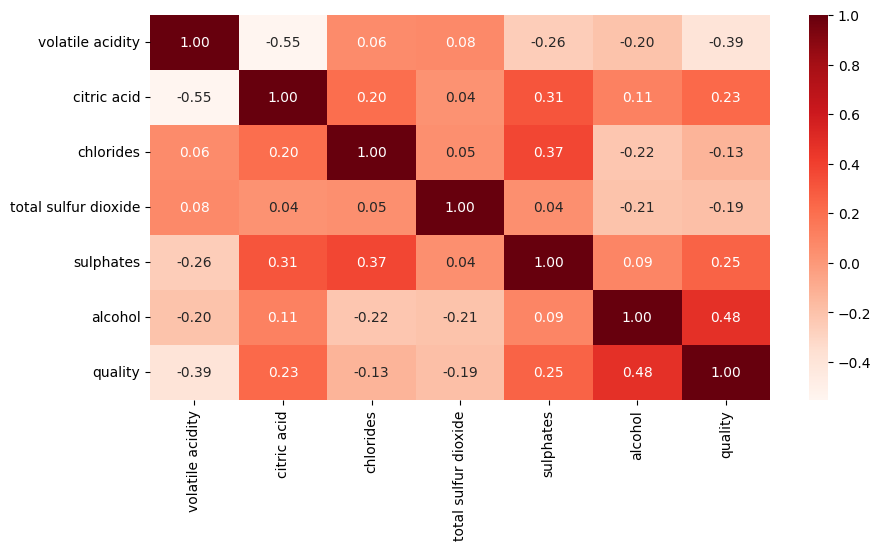

In [31]:
# correlation and headtmap
plt.figure(figsize = (10,5))
trans2_corr_matrix = df_trans2.corr()
sns.heatmap(trans2_corr_matrix, annot=True,cmap='Reds', fmt = '.2f')

## Outliers

In [32]:
df_trans2.describe()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.087467,46.467792,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.047065,32.895324,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.012000,6.000000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.070000,22.000000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.079000,38.000000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.090000,62.000000,0.730000,11.100000,6.000000
max,1.580000,1.000000,0.611000,289.000000,2.000000,14.900000,8.000000


In [33]:
fig = make_subplots(rows=2, cols=3, subplot_titles=df_trans2.columns[:-1])

for i, column in enumerate(df_trans2.columns[:-1]): 
    row = (i // 3) + 1
    col = (i % 3) + 1
    box_trace = go.Box(x=df_trans2['quality'], y=df_trans2[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=980,
    width=1600 
)
fig.show()

In [34]:
X = df_trans2.drop(columns=["quality"])
y = df_trans2["quality"].to_numpy()

In [73]:
from sklearn.ensemble import IsolationForest
import numpy as np

clf = IsolationForest(n_estimators=100)
out = clf.fit_predict(X)
print(f"Cantidad de outliers: {abs(out[out==-1].sum())}")

Cantidad de outliers: 196


In [36]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=10)
estimado_LOF = clf.fit_predict(X)

print(f"Cantidad de outliers: {abs(estimado_LOF[estimado_LOF==-1].sum())}")

Cantidad de outliers: 35


In [37]:
df_clean = df_trans2[~(estimado_LOF==-1)]
df_clean.shape

(1564, 7)

In [38]:
df_clean.describe()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000,1564.000000
mean,0.529201,0.269533,0.087178,45.627238,0.656483,10.387308,5.629795
std,0.177704,0.193376,0.044107,31.435939,0.166260,1.019853,0.798532
min,0.120000,0.000000,0.012000,6.000000,0.330000,8.500000,3.000000
25%,0.400000,0.090000,0.071000,22.000000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.080000,37.000000,0.620000,10.100000,6.000000
75%,0.640000,0.420000,0.090000,61.000000,0.730000,11.000000,6.000000
max,1.580000,0.790000,0.611000,153.000000,1.980000,14.000000,8.000000


In [39]:
df_trans2.describe()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.087467,46.467792,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.047065,32.895324,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.012000,6.000000,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.070000,22.000000,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.079000,38.000000,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.090000,62.000000,0.730000,11.100000,6.000000
max,1.580000,1.000000,0.611000,289.000000,2.000000,14.900000,8.000000


In [40]:
fig = make_subplots(rows=2, cols=3, subplot_titles=df_clean.columns[:-1])

for i, column in enumerate(df_clean.columns[:-1]): 
    row = (i // 3) + 1
    col = (i % 3) + 1
    box_trace = go.Box(x=df_clean['quality'], y=df_clean[column], name=column)
    fig.add_trace(box_trace, row=row, col=col)
    fig.update_xaxes(title_text='Quality', row=row, col=col)

fig.update_layout(
    showlegend=False,
    height=980,
    width=1600 
)
fig.show()

## Transformar la variable objetivo a 3 calidades (baja, media y alta)

Dividiremos la calidad de nuestros datos en 3 categorias, ya que hay muy pocas muestras de las clases mas bajas y más altas.

In [195]:
bins = [3,5,7,9] # Definimos los bins que separan los datos
bin_labels = ["low", "med", "high"] # Los nombres que recibiran
# pd.cut(df_clean["quality"], bins=bins, labels=bin_labels, right=False)
# Una prueba
test_qualities = [3,4 ,5,6, 7,8]
print(f"Usando las calidades de prueba {test_qualities} obtenemos las siguientes etiquetas:")
print(pd.cut(test_qualities, bins=bins, labels=bin_labels, right=False))

Usando las calidades de prueba [3, 4, 5, 6, 7, 8] obtenemos las siguientes etiquetas:
['low', 'low', 'med', 'med', 'high', 'high']
Categories (3, object): ['low' < 'med' < 'high']


In [196]:
df_clean["quality"] = pd.cut(df_clean["quality"], bins=bins, labels=bin_labels, right=False)

C:\Users\Guillermo\AppData\Local\Temp\ipykernel_26376\56503454.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [197]:
df_clean.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.56,9.4,med
1,0.88,0.00,0.098,67.0,0.68,9.8,med
2,0.76,0.04,0.092,54.0,0.65,9.8,med
3,0.28,0.56,0.075,60.0,0.58,9.8,med
4,0.70,0.00,0.076,34.0,0.56,9.4,med


In [198]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=["low", "med", "high"])
ordinal_encoder.fit_transform(df_clean["quality"])

ValueError: Expected 2D array, got 1D array instead:
array=['med' 'med' 'med' ... 'med' 'med' 'med'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# 3. Entrenamiento
- Separar usando K-Folds
- Usar escalamiento

## Escalamiento de los datos

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
X_clean = df_clean.drop(columns=["quality"])
y_clean = df_clean["quality"].to_numpy()

In [43]:
scaler = StandardScaler()
scaler.fit(X_clean)

StandardScaler()

In [44]:
X_std = scaler.transform(X_clean)

In [164]:
from sklearn.model_selection import train_test_split

n_folds = 5

train_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X_std, y_clean, test_size=train_size, stratify=y_clean)

print(f"Se usarán {X_train.shape[0]} entradas para el entrenamiento del modelo usando K-Fold ({n_folds} folds)")
print(f"Se reservó un {int(train_size*100)}% de los datos ({X_test.shape[0]}) para validar al final del entrenamiento.")

Se usarán 1251 entradas para el entrenamiento del modelo usando K-Fold (5 folds)
Se reservó un 20% de los datos (313) para validar al final del entrenamiento.


In [165]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [166]:
rf_model = RandomForestClassifier()

# Grid Search Cross Validation para encontrar los mejores parámetros

In [171]:
from sklearn.model_selection import GridSearchCV

# Los parámetros que queremos probar
grid = {
    'n_estimators': [20,30,40,50,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
}

rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv=n_folds, n_jobs=8)

In [172]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [20, 30, 40, 50, 100]})

In [173]:
rf_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'n_estimators': 100}

In [174]:
rf_model_best = RandomForestClassifier(**rf_cv.best_params_)
rf_model_best.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=8)

In [178]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [186]:
y_hat = rf_model_best.predict(X_test)

print(confusion_matrix(y_test, y_hat))
print(accuracy_score(y_test, y_hat))
print(f1_score(y_test, y_hat, average='micro'))
print(classification_report(y_test, y_hat))

[[  0   0   2   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 108  27   0   0]
 [  0   0  41  79   5   0]
 [  0   0   2  19  17   0]
 [  0   0   0   2   1   0]]
0.6517571884984026
0.6517571884984026
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.68      0.80      0.73       135
           6       0.61      0.63      0.62       125
           7       0.74      0.45      0.56        38
           8       0.00      0.00      0.00         3

    accuracy                           0.65       313
   macro avg       0.34      0.31      0.32       313
weighted avg       0.62      0.65      0.63       313



c:\Users\Guillermo\.conda\envs\mcd\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Guillermo\.conda\envs\mcd\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Guillermo\.conda\envs\mcd\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [140]:
def hola(a, b, c):
    print(a, b, c)

d = {'a':1, 'b': 3, 'c': 10}

hola(**d)

1 3 10
